In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from ipywidgets import interactive, FloatSlider, Checkbox, VBox

In [34]:
# Функція генерації чистої гармоніки
def generate_harmonic(amplitude, frequency, phase, num_samples=1000):
    x = np.linspace(0, 2 * np.pi, num_samples)
    y = amplitude * np.sin(frequency * x + phase)
    return x, y

# Додавання шуму
def add_noise(signal, mean=0, std=0.1):
    noise = np.random.normal(mean, std, len(signal))
    return signal + noise

# Фільтр Баттерворта
def butterworth_filter(signal, cutoff_frequency, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal


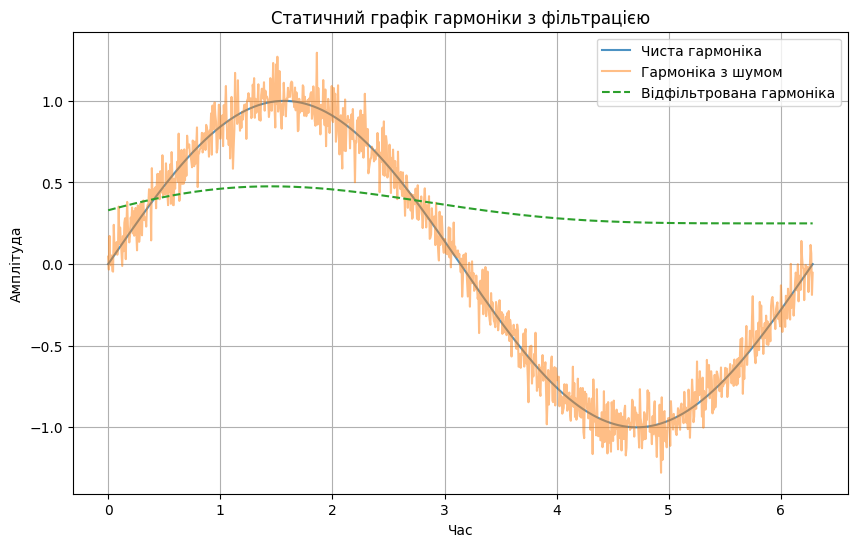

In [35]:
def plot_static(amplitude, frequency, phase, noise_mean, noise_std, cutoff_frequency):
    x, clean = generate_harmonic(amplitude, frequency, phase)
    noisy = add_noise(clean, noise_mean, noise_std)
    fs = 1000
    filtered = butterworth_filter(noisy, cutoff_frequency, fs)

    plt.figure(figsize=(10,6))
    plt.plot(x, clean, label='Чиста гармоніка', alpha=0.8)
    plt.plot(x, noisy, label='Гармоніка з шумом', alpha=0.5)
    plt.plot(x, filtered, label='Відфільтрована гармоніка', linestyle='--')
    plt.title('Статичний графік гармоніки з фільтрацією')
    plt.xlabel('Час')
    plt.ylabel('Амплітуда')
    plt.grid(True)
    plt.legend()
    plt.show()

# Виклик для прикладу:
plot_static(amplitude=1.0, frequency=1.0, phase=0.0, noise_mean=0.0, noise_std=0.1, cutoff_frequency=1.0)


In [36]:
def plot_interactive(amplitude, frequency, phase, noise_mean, noise_std, show_filtered, cutoff_frequency):
    x, clean = generate_harmonic(amplitude, frequency, phase)
    noisy = add_noise(clean, noise_mean, noise_std)
    fs = 1000
    filtered = butterworth_filter(noisy, cutoff_frequency, fs)

    plt.figure(figsize=(10,6))
    plt.plot(x, clean, label='Чиста гармоніка', alpha=0.8)
    plt.plot(x, noisy, label='Гармоніка з шумом', alpha=0.5)
    if show_filtered:
        plt.plot(x, filtered, label='Відфільтрована гармоніка', linestyle='--')
    plt.title('Інтерактивний графік гармоніки з фільтрацією')
    plt.xlabel('Час')
    plt.ylabel('Амплітуда')
    plt.grid(True)
    plt.legend()
    plt.show()

# Створення інтерактивних віджетів
amplitude_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Амплітуда')
frequency_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Частота')
phase_slider = FloatSlider(min=0, max=2*np.pi, step=0.1, value=0.0, description='Фаза')
noise_mean_slider = FloatSlider(min=-1.0, max=1.0, step=0.1, value=0.0, description='Шум (mean)')
noise_std_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=0.1, description='Шум (std)')
show_filtered_checkbox = Checkbox(value=True, description='Показати фільтр')
cutoff_frequency_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Частота відсічки')

interactive_plot = interactive(
    plot_interactive,
    amplitude=amplitude_slider,
    frequency=frequency_slider,
    phase=phase_slider,
    noise_mean=noise_mean_slider,
    noise_std=noise_std_slider,
    show_filtered=show_filtered_checkbox,
    cutoff_frequency=cutoff_frequency_slider
)

VBox([interactive_plot])
